In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
finals_roster = 'Resources/17-18 finals team payroll.csv'

finals_df = pd.read_csv(finals_roster)

finals_df

,Player,Team,Age,Position,Salary
0,Stephen Curry,GSW,30,G,34682550
1,Kevin Durant,GSW,29,F,25000000
2,Klay Thompson,GSW,28,G,17826150
3,Draymond Green,GSW,28,F,16400000
4,Andre Iguodala,GSW,34,F,14814815
5,Shaun Livingston,GSW,32,G,7692308
6,Nick Young,GSW,32,G,5192000
7,Zaza Pachulia,GSW,34,C,3477600
8,David West,GSW,37,C,2328652
9,JaVale McGee,GSW,30,C,2116955


In [15]:
#Team Payrolls
teams_df = finals_df.groupby("Team")

payrolls_df = teams_df["Salary"].sum()

team_payroll_df = pd.DataFrame({"Total Payroll": payroll_df})

team_payroll_df

,Total Payroll
Team,
CLE,138719417
GSW,136549719


In [16]:
# Average Guard Salaries and Percent of Payroll

guard_df = finals_df[finals_df['Position'].str.startswith('G')]

teams_df = guard_df.groupby("Team")

guard_salary_df = teams_df["Salary"].sum()

guard_percent_df = guard_salary_df / payrolls_df * 100

team_guard_salaries_df =  pd.DataFrame({"Guards (G)": guard_salary_df,
                                       "% of Total Payroll (G)": guard_percent_df})

team_guard_salaries_df

,Guards (G),% of Total Payroll (G)
Team,,
CLE,58440805,42.128785
GSW,66705619,48.850792


In [17]:
# Average Forward Salaries and Percent of Payroll 

forward_df = finals_df[finals_df['Position'].str.startswith('F')]

teams_df = forward_df.groupby("Team")

forward_salary_df = teams_df["Salary"].sum()

forward_percent_df = forward_salary_df / payrolls_df * 100

team_forward_salaries_df =  pd.DataFrame({"Forwards (F)": forward_salary_df,
                                       "% of Total Payroll (F)": forward_percent_df})

team_forward_salaries_df

,Forwards (F),% of Total Payroll (F)
Team,,
CLE,38119680,27.479700
GSW,58321285,42.710659


In [18]:
# Average Center Salaries and Percent of Payroll

center_df = finals_df[finals_df['Position'].str.startswith('C')]

teams_df = center_df.groupby("Team")

center_salary_df = teams_df["Salary"].sum()

center_percent_df = center_salary_df / payrolls_df * 100

team_center_salaries_df =  pd.DataFrame({"Centers (C)": center_salary_df,
                                       "% of Total Payroll (C)": center_percent_df})

team_center_salaries_df

,Centers (C),% of Total Payroll (C)
Team,,
CLE,42158932,30.391515
GSW,11522815,8.438549


In [19]:
# Average Age of Rosters

teams_df = finals_df.groupby("Team")

average_age_df = teams_df["Age"].mean()

age_comp_df = pd.DataFrame({"Avg. Age": average_age_df})

age_comp_df

,Avg. Age
Team,
CLE,28.3125
GSW,28.8000


In [24]:
# Average Age of Guards

guard_df = finals_df[finals_df['Position'].str.startswith('G')]

teams_df = guard_df.groupby("Team")

guard_average_age_df = teams_df["Age"].mean()

g_age_comp_df = pd.DataFrame({"Avg. Age (G)": guard_average_age_df})

g_age_comp_df

,Avg. Age (G)
Team,
CLE,30.0
GSW,28.8


In [25]:
#Average Age of Forwards
forward_df = finals_df[finals_df['Position'].str.startswith('F')]

teams_df = forward_df.groupby("Team")

forward_average_age_df = teams_df["Age"].mean()

f_age_comp_df = pd.DataFrame({"Avg. Age (F)": forward_average_age_df})

f_age_comp_df

,Avg. Age (F)
Team,
CLE,27.75
GSW,30.00


In [27]:
#Average Age of Centers
center_df = finals_df[finals_df['Position'].str.startswith('C')]

teams_df = center_df.groupby("Team")

center_average_age_df = teams_df["Age"].mean()

c_age_comp_df = pd.DataFrame({"Avg. Age (C)": center_average_age_df})

c_age_comp_df

,Avg. Age (C)
Team,
CLE,25.5
GSW,28.0


In [41]:
#Age and Salary Summary for All Positions into Summary Table
teams_merge1_df = pd.merge(team_payroll_df,age_comp_df,on="Team")
teams_merge2_df = pd.merge(teams_merge1_df,team_guard_salaries_df,on="Team")
teams_merge3_df = pd.merge(teams_merge2_df,g_age_comp_df,on="Team")
teams_merge4_df = pd.merge(teams_merge3_df,team_forward_salaries_df,on="Team")
teams_merge5_df = pd.merge(teams_merge4_df,f_age_comp_df,on="Team")
teams_merge6_df = pd.merge(teams_merge5_df,team_center_salaries_df,on="Team")
team_full_merge_df = pd.merge(teams_merge6_df,c_age_comp_df,on="Team")

team_full_merge_df

,Total Payroll,Avg. Age,Guards (G),% of Total Payroll (G),Avg. Age (G),Forwards (F),% of Total Payroll (F),Avg. Age (F),Centers (C),% of Total Payroll (C),Avg. Age (C)
Team,,,,,,,,,,,
CLE,138719417,28.3125,58440805,42.128785,30.0,38119680,27.479700,27.75,42158932,30.391515,25.5
GSW,136549719,28.8000,66705619,48.850792,28.8,58321285,42.710659,30.00,11522815,8.438549,28.0


In [42]:
position_group = team_full_merge_df.groupby('Team')

#Team Position Salary Breakdown
payroll_by_position = position_group['Guards (G)','Forwards (F)','Centers (C)'].sum()

payroll_by_position

<ipython-input-42-3de90d53f386>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  payroll_by_position = position_group['Guards (G)','Forwards (F)','Centers (C)'].sum()


,Guards (G),Forwards (F),Centers (C)
Team,,,
CLE,58440805,38119680,42158932
GSW,66705619,58321285,11522815


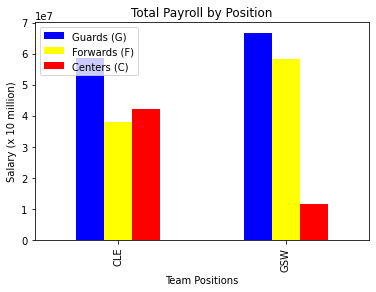

In [51]:
# Create a bar chart based off of the payroll by positon data

from matplotlib.colors import ListedColormap
colors = ListedColormap(['blue','yellow','red'],name="from_list")
position_chart = payroll_by_position.plot(kind='bar',colormap = colors)
position_chart.set_xlabel("Team Positions")
position_chart.set_ylabel("Salary (x 10 million)")
plt.title("Total Payroll by Position")
plt.savefig('positionpayroll.png')
plt.show()

In [44]:
position_age = team_full_merge_df.groupby('Team')

#Team Average Position Salary Breakdown
position_mean_age = position_group['Avg. Age (G)','Avg. Age (F)','Avg. Age (C)'].sum()

position_mean_age

<ipython-input-44-d93038767a6a>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  position_mean_age = position_group['Avg. Age (G)','Avg. Age (F)','Avg. Age (C)'].sum()


,Avg. Age (G),Avg. Age (F),Avg. Age (C)
Team,,,
CLE,30.0,27.75,25.5
GSW,28.8,30.00,28.0


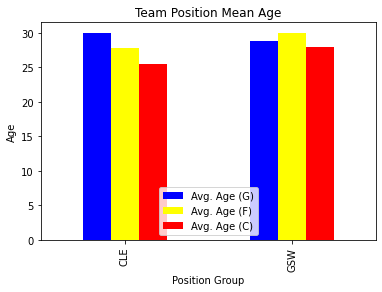

In [49]:
# Create a bar chart based off of the position_mean_age data

colors = ListedColormap(['blue','yellow','red'],name="from_list")
age_chart = position_mean_age.plot(kind='bar',colormap = colors)
age_chart.set_xlabel("Position Group")
age_chart.set_ylabel("Age")
plt.title("Team Position Mean Age")
plt.savefig('position_mean_age.png')
plt.show()

In [52]:
position_group = team_full_merge_df.groupby('Team')

# Team Position Salary Percent Breakdown
position_percent = position_group['% of Total Payroll (G)','% of Total Payroll (F)','% of Total Payroll (C)'].sum()

position_percent

<ipython-input-52-358fd5fbc6d2>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  position_percent = position_group['% of Total Payroll (G)','% of Total Payroll (F)','% of Total Payroll (C)'].sum()


,% of Total Payroll (G),% of Total Payroll (F),% of Total Payroll (C)
Team,,,
CLE,42.128785,27.479700,30.391515
GSW,48.850792,42.710659,8.438549


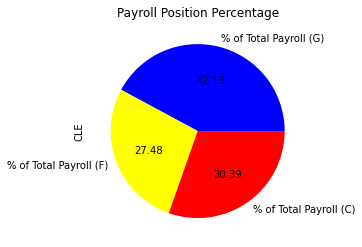

<Figure size 1080x1080 with 0 Axes>

In [53]:
east_team = "CLE"
cleveland_payroll_percent = position_percent.loc[east_team]
colors = ListedColormap(['blue','yellow','red'],name="from_list")
cleveland_payroll_percent = cleveland_payroll_percent.plot(kind="pie",colormap = colors,y= ['% of Total Payroll (G)','% of Total Payroll (F)','% of Total Payroll (C)'],autopct='%.2f',title=("Payroll Position Percentage" ))
plt.savefig('Cleveland_payroll_percent_comp.png')
plt.figure(figsize=(15,15))

plt.show()


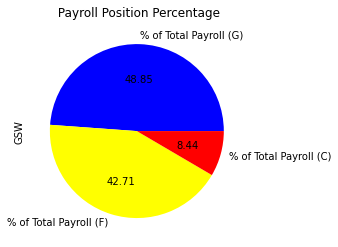

<Figure size 1080x1080 with 0 Axes>

In [55]:
west_team = "GSW"
warriors_payroll_percent = position_percent.loc[west_team]
colors = ListedColormap(['blue','yellow','red'],name="from_list")
warriors_payroll_percent = warriors_payroll_percent.plot(kind="pie",colormap = colors,y= ['% of Total Payroll (G)','% of Total Payroll (F)','% of Total Payroll (C)'],autopct='%.2f',title=(" Payroll Position Percentage" ))
plt.savefig('warriors_percent_comp.png')
plt.figure(figsize=(15,15))

plt.show()